### Introducción
 ##### La ciencia de datos juega un papel preponderante y en crecimiento en cuanto al análisis y predicciones de los resultados de los eventos deportivos. Estos se usa principalmente en el fútbol europeo donde casi todos los equipos y selecciones del continente, tienen departamentos de datos dedicados a identificar jugadores, estudiar lesiones y el reclutamiento de nuevos talentos. También, se ve mucha aplicación en el básquet y béisbol en EE.UU. por lo mismos motivos. 

 ##### En el mundo de tenis, los datos están presentes como algo descriptivo del juego y que, hace años, está presente en las transmiciones de TV como en las páginas web del circuito profesional. Actualmente, la data de los partidos se usa mucho para las casas de apuestas para determinar las probabilidades del ganador del partido. No se usa mucho para el desarrollo del club o equipo como se usa en el fútbol, todavía es algo "verde". 
 
 ##### Cómo amante del tenis, busco crear un modelo que me permita saber de antemano, cuál es el jugador que tiene mas chances de ganar un partido.
 
 ##### En nuestro caso, busco hacer una análisis completo de cada perfil de jugador y entender cuáles son los mejores match-ups y que probabilidades tienen de ganar.

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_truncated_2 = pd.read_csv('atp_matches_2004_2022_w_l.csv')


Data description

• tourney_id - tournament_id

• tourney_name - tournament_name

• surface - surface in which the match is played

• draw_size - the size of the draw

• tourney_level - tournament level

'G' = Grand Slams

'M' = Masters 1000s

'A' = other tour-level events

'C' = Challengers

'S' = Satellites/ITFs

'F' = Tour finals and other season-ending events

'D' = Davis Cup

• tourney_date - starting date of the tournament

• match num - match number in a certain tournament

• id - player id

• seed - the seed of the player in that tournament

• entry - How did the player enter the tournaments?

WC - Wildcard

Q - Qualifier

LL - Lucky loser

PR - Protected ranking

SE - Special Exempt

ALT - Alternate player

• name - player name

• hand - hand of the player, right or left

• ht - the height of the player

• IOC - the country of origin

• age - age of the player

• score - final score in the match

• best_of - the maximum number of sets played

• round - the round in the tournament a match belongs to

• minutes - duration of the match in minutes

• ace - number of aces in the match
• df - double faults

• svpt - serve percent

• 1stin - first serve in percent

• 1stWon - first serve winning percent

• 2ndWon - second serve winning percent

• SvGms - number of games played on serve (So, the maximum difference between w_SvGms and l_SvGms will be 1)

• bpSaved - breakpoints saved

• bpFaced - breakpoints faced


In [3]:
df_truncated_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50996 entries, 0 to 50995
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          50996 non-null  int64 
 1   tourney_id          50996 non-null  object
 2   tourney_name        50996 non-null  object
 3   surface             50996 non-null  object
 4   draw_size           50996 non-null  int64 
 5   tourney_level       50996 non-null  object
 6   tourney_date        50996 non-null  int64 
 7   match_num           50996 non-null  int64 
 8   winner_id           50996 non-null  int64 
 9   winner_seed         50996 non-null  int64 
 10  winner_entry        50996 non-null  object
 11  winner_name         50996 non-null  object
 12  winner_hand         50996 non-null  object
 13  winner_ht           50996 non-null  int64 
 14  winner_ioc          50996 non-null  object
 15  winner_age          50996 non-null  int64 
 16  loser_id            50

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
pd.set_option('display.max_rows', None)

#### Para el caso de este análisis preliminar, haremos un breve EDA con un jugador conocido: Novak Djokovic.

#### Usaremos un dataset ya modificado en entragas anteriores, con el data wrangling ya hecho.

#### Tomaremos los partidos donde Novak haya jugado. Buscamos tanto del lado del ganador como perdedor.

In [6]:
df_novak_1 = df_truncated_2[df_truncated_2['winner_name'] == 'Novak Djokovic']

In [7]:
df_novak_1.shape

(998, 50)

In [8]:
df_novak_1.sample(10)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
35559,172218,2016-5014,Shanghai Masters,Hard,64,M,20161010,293,104925,1,0,Novak Djokovic,R,188,SRB,29,105577,0,Q,Vasek Pospisil,R,193,CAN,26,6-4 6-4,3,R16,80,2,0,53,32,23,15,10,0,1,12,6,65,44,30,8,10,3,6,1,13540,131,456
44200,181049,2020-8888,Atp Cup,Hard,24,A,20200106,300,104925,0,0,Novak Djokovic,R,188,SRB,32,104745,0,0,Rafael Nadal,L,185,ESP,33,6-2 7-6(4),3,F,115,12,2,64,49,41,9,10,5,5,5,3,70,51,39,6,10,6,8,2,9055,1,9985
10098,143656,2007-421,Canada Masters,Hard,56,M,20070805,54,104925,3,0,Novak Djokovic,R,188,SRB,20,104745,2,0,Rafael Nadal,L,185,ESP,21,7-5 6-3,3,SF,111,11,2,71,46,37,15,11,8,8,2,2,61,42,26,11,10,2,4,4,3200,2,5455
21033,156168,2011-520,Roland Garros,Clay,128,G,20110522,120,104925,2,0,Novak Djokovic,R,188,SRB,24,104755,13,0,Richard Gasquet,R,185,FRA,24,6-4 6-4 6-2,5,R16,107,8,0,70,49,44,14,14,3,3,6,2,86,53,35,15,14,4,8,2,11665,16,1755
49896,186900,2022-540,Wimbledon,Grass,128,G,20220627,212,104925,1,0,Novak Djokovic,R,188,SRB,35,126646,0,0,Tim Van Rijthoven,R,188,NED,25,6-2 4-6 6-1 6-2,5,R16,158,7,2,97,61,46,25,17,3,4,20,5,124,80,53,15,16,11,17,3,6770,104,546
16516,150826,2009-560,US Open,Hard,128,G,20090831,73,104925,4,0,Novak Djokovic,R,188,SRB,22,104958,0,Q,Carsten Ball,L,198,AUS,22,6-3 6-4 6-4,5,R64,109,3,0,75,46,35,23,15,1,2,8,7,93,53,37,18,14,14,18,4,7660,155,402
20400,155532,2011-404,Indian Wells Masters,Hard,96,M,20110310,86,104925,3,0,Novak Djokovic,R,188,SRB,23,104678,16,0,Viktor Troicki,R,193,SRB,25,6-0 6-1,3,R16,66,1,4,60,40,29,10,7,4,4,3,5,43,26,12,4,6,4,9,3,7800,18,1710
23986,159562,2012-540,Wimbledon,Grass,128,G,20120625,113,104925,1,0,Novak Djokovic,R,188,SRB,25,104678,0,0,Viktor Troicki,R,193,SRB,26,6-3 6-1 6-3,5,R16,90,4,2,70,53,43,9,13,3,4,3,2,73,42,23,13,12,2,8,1,12280,34,1190
10810,144373,2007-520,Roland Garros,Clay,128,G,20070528,117,104925,6,0,Novak Djokovic,R,188,SRB,20,104269,0,0,Fernando Verdasco,L,188,ESP,23,6-3 6-3 7-6(1),5,R16,165,9,1,113,81,55,19,15,6,7,3,2,116,86,55,12,15,15,19,6,2810,51,695
42220,178963,2019-M007,Miami Masters,Hard,128,M,20190318,285,104925,1,0,Novak Djokovic,R,188,SRB,31,105643,0,0,Federico Delbonis,L,190,ARG,28,7-5 4-6 6-1,3,R32,120,3,3,77,53,41,12,15,1,4,8,5,84,54,36,12,14,7,12,1,10990,83,676


In [9]:
df_novak_2 = df_truncated_2[df_truncated_2['loser_name'] == 'Novak Djokovic']

In [10]:
df_novak_2.shape

(193, 50)

In [11]:
df_novak_2.sample(10)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
23998,159574,2012-540,Wimbledon,Grass,128,G,20120625,125,103819,3,0,Roger Federer,R,185,SUI,30,104925,1,0,Novak Djokovic,R,188,SRB,25,6-3 3-6 6-4 6-3,5,SF,139,12,0,101,65,49,26,19,2,3,9,2,115,73,52,24,18,8,11,3,9435,1,12280
39389,176104,2018-M006,Indian Wells Masters,Hard,128,M,20180305,242,106121,0,Q,Taro Daniel,R,191,JPN,25,104925,10,0,Novak Djokovic,R,188,SRB,30,7-6(3) 4-6 6-1,3,R64,150,1,8,107,52,37,28,15,5,7,4,4,94,60,39,18,14,8,11,109,539,13,2380
15988,150297,2009-500,Halle,Grass,32,A,20090608,31,103163,0,WC,Tommy Haas,R,188,GER,31,104925,2,0,Novak Djokovic,R,188,SRB,22,6-3 6-7(4) 6-1,3,F,132,10,6,103,57,47,26,15,4,4,4,3,86,46,29,24,13,7,10,41,1195,4,8020
41534,178271,2019-0451,Doha,Hard,32,A,20181231,299,105138,7,0,Roberto Bautista Agut,R,183,ESP,30,104925,1,0,Novak Djokovic,R,188,SRB,31,3-6 7-6(6) 6-4,3,SF,155,7,0,88,66,52,11,15,2,4,9,3,114,72,48,27,16,6,8,24,1605,1,9045
45001,181854,2020-560,Us Open,Hard,128,G,20200831,212,105807,20,0,Pablo Carreno Busta,R,188,ESP,29,104925,1,0,Novak Djokovic,R,188,SRB,33,6-5 DEF,5,R16,60,3,0,36,24,18,6,5,4,4,9,0,28,20,16,5,6,1,2,27,1500,1,10860
53,132486,2004-1720,Bangkok,Hard,32,A,20040927,7,102615,0,0,Dennis Van Scheppingen,R,185,NED,29,104925,0,WC,Novak Djokovic,R,188,SRB,17,4-6 7-5 6-4,3,R32,112,7,7,88,57,39,18,16,3,7,15,12,118,70,45,22,16,10,15,81,496,248,148
8011,141215,2006-520,Roland Garros,Clay,128,G,20060529,124,104745,2,0,Rafael Nadal,L,185,ESP,19,104925,0,0,Novak Djokovic,R,188,SRB,19,6-4 6-4 RET,5,QF,114,3,0,59,47,30,7,10,3,6,2,3,67,49,27,4,10,2,7,2,4545,63,627
40772,177494,2018-0421,Canada Masters,Hard,64,M,20180806,287,126774,0,0,Stefanos Tsitsipas,R,193,GRE,19,104925,9,0,Novak Djokovic,R,188,SRB,31,6-3 6-7(5) 6-3,3,R16,137,11,2,92,55,46,25,16,2,2,11,4,97,56,41,25,14,8,10,27,1534,10,3355
35565,172224,2016-5014,Shanghai Masters,Hard,64,M,20161010,299,105138,15,0,Roberto Bautista Agut,R,183,ESP,28,104925,1,0,Novak Djokovic,R,188,SRB,29,6-4 6-4,3,SF,108,5,1,86,56,36,14,10,7,9,4,2,60,40,25,10,10,1,5,19,1950,1,13540
25021,160671,2012-352,Paris Masters,Hard,48,M,20121029,32,105023,0,0,Sam Querrey,R,198,USA,25,104925,2,0,Novak Djokovic,R,188,SRB,25,0-6 7-6(5) 6-4,3,R32,121,18,5,95,55,40,16,14,6,10,8,3,93,57,45,15,14,2,4,23,1560,2,11970


#### Hacemos una descripción de los datos brindados de sus trinufos. El énfasis va a ser los campos w_ y l_ ya que indican los números del ganador (w_ > Novak Djokovic) contra los del perdedor (l_ > Rivales). Esto nos dará un detalle a priori, de los datos que son importantes a analizar.

In [12]:
df_novak_1.describe()

,Unnamed: 0,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,998.000000,998.000000,9.980000e+02,998.000000,998.0,998.000000,998.0,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,163344.118236,77.074148,2.013561e+07,143.706413,104925.0,2.205411,188.0,26.091182,107663.613226,4.171343,186.616232,26.537074,3.677355,108.625251,5.713427,2.152305,75.312625,49.055110,37.083166,14.997996,12.432866,3.022044,4.410822,4.971944,2.965932,80.500000,48.603206,31.398798,13.735471,12.008016,5.103206,9.421844,5.390782,9207.080160,50.835671,2096.990982
std,13639.722463,42.168127,4.647894e+04,172.387597,0.0,2.693819,0.0,4.691560,13640.920685,7.159432,10.775265,3.767587,0.946995,50.808724,3.821236,1.940657,29.089466,19.131807,13.640171,6.173844,4.290948,2.813407,3.662760,4.504229,2.102881,30.480201,19.871172,14.527989,7.190778,4.296897,3.338534,4.208865,15.753798,4206.847636,75.438465,2248.417335
min,135216.000000,2.000000,2.004091e+07,1.000000,104925.0,0.000000,188.0,17.000000,100644.000000,0.000000,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,12.000000,8.000000,6.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,16.000000,9.000000,3.000000,1.000000,3.000000,0.000000,1.000000,1.000000,128.000000,0.000000,0.000000
25%,151368.000000,32.000000,2.009337e+07,40.000000,104925.0,1.000000,188.0,22.000000,104028.250000,0.000000,183.000000,24.000000,3.000000,78.000000,3.000000,1.000000,55.000000,35.000000,27.000000,11.000000,9.000000,1.000000,2.000000,2.000000,2.000000,59.000000,34.000000,21.000000,9.000000,9.000000,3.000000,6.000000,1.000000,6405.000000,12.000000,749.250000
50%,163346.000000,64.000000,2.013093e+07,93.000000,104925.0,1.000000,188.0,26.000000,104731.000000,0.000000,185.000000,26.000000,3.000000,100.000000,5.000000,2.000000,69.000000,45.500000,35.000000,14.000000,11.000000,2.000000,4.000000,4.000000,3.000000,75.500000,46.000000,29.000000,12.000000,11.000000,5.000000,9.000000,2.000000,10220.000000,33.000000,1210.500000
75%,174152.000000,128.000000,2.017063e+07,225.000000,104925.0,3.000000,188.0,30.000000,105379.000000,6.000000,190.000000,29.000000,5.000000,134.000000,8.000000,3.000000,90.000000,58.000000,44.000000,18.000000,15.000000,4.000000,6.000000,7.000000,4.000000,94.750000,58.000000,38.000000,17.000000,14.000000,7.000000,12.000000,3.000000,12150.000000,65.000000,2443.750000
max,187952.000000,128.000000,2.022111e+07,1601.000000,104925.0,20.000000,188.0,35.000000,208029.000000,33.000000,208.000000,38.000000,5.000000,353.000000,26.000000,12.000000,219.000000,136.000000,102.000000,49.000000,34.000000,19.000000,24.000000,40.000000,15.000000,225.000000,150.000000,102.000000,58.000000,34.000000,19.000000,27.000000,272.000000,16950.000000,1543.000000,13130.000000


In [13]:
df_novak_1['w_1serve_per'] = ((df_novak_1['w_1stIn']/df_novak_1['w_svpt'])*100).astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19428\2738301976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novak_1['w_1serve_per'] = ((df_novak_1['w_1stIn']/df_novak_1['w_svpt'])*100).astype(int)


In [14]:
df_novak_1.sample(10)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,w_1serve_per
49909,186914,2022-540,Wimbledon,Grass,128,G,20220627,226,104925,1,0,Novak Djokovic,R,188,SRB,35,106401,0,0,Nick Kyrgios,R,193,AUS,27,4-6 6-3 6-4 7-6(3),5,F,181,15,7,119,75,62,27,22,5,6,30,7,125,91,64,18,20,2,4,3,6770,40,1070,63
17917,152714,2010-410,Monte Carlo Masters,Clay,56,M,20100411,41,104925,1,0,Novak Djokovic,R,188,SRB,22,104527,13,0,Stan Wawrinka,R,183,SUI,25,6-4 6-4,3,R16,101,2,1,61,43,28,10,10,3,5,4,1,66,39,23,14,10,6,10,2,7630,20,1780,70
27457,163434,2013-5014,Shanghai Masters,Hard,56,M,20131007,53,104925,1,0,Novak Djokovic,R,188,SRB,26,104542,7,0,Jo-Wilfried Tsonga,R,188,FRA,28,6-2 7-5,3,SF,94,6,2,60,40,26,13,10,1,3,4,2,72,45,26,9,10,5,10,2,11120,9,3115,66
28454,164568,2014-403,Miami Masters,Hard,96,M,20140319,88,104925,2,0,Novak Djokovic,R,188,SRB,26,103990,16,0,Tommy Robredo,R,180,ESP,31,6-3 7-5,3,R16,82,5,2,60,39,32,14,11,1,1,2,1,58,44,31,6,10,0,2,2,10900,17,2050,65
35166,171822,2016-560,US Open,Hard,128,G,20160829,100,104925,1,0,Novak Djokovic,R,188,SRB,29,105668,0,0,Jerzy Janowicz,R,203,POL,25,6-3 5-7 6-2 6-1,5,R128,157,12,5,114,71,49,27,18,10,12,5,13,117,63,40,22,18,13,20,1,14840,247,216,62
41497,178226,2018-0605,Tour Finals,Hard,8,F,20181112,295,104925,1,0,Novak Djokovic,R,188,SRB,31,104545,8,0,John Isner,R,206,USA,33,6-4 6-3,3,RR,73,6,1,43,30,26,11,9,0,0,13,2,65,45,30,8,10,6,9,1,8045,10,3155,69
23019,158477,2012-404,Indian Wells Masters,Hard,96,M,20120308,33,104925,1,0,Novak Djokovic,R,188,SRB,24,104979,0,Q,Andrey Golubev,R,185,KAZ,24,6-3 6-2,3,R64,80,1,1,51,31,24,12,9,1,2,0,4,66,34,22,11,8,4,8,1,13310,145,372,60
47089,184062,2021-520,Roland Garros,Clay,128,G,20210531,226,104925,1,0,Novak Djokovic,R,188,SRB,34,126774,5,0,Stefanos Tsitsipas,R,193,GRE,22,6-7(6) 2-6 6-3 6-2 6-4,5,F,251,5,3,134,91,71,23,24,5,8,14,4,177,109,73,34,23,11,16,1,11313,5,7500,67
40379,177098,2018-540,Wimbledon,Grass,128,G,20180702,139,104925,12,0,Novak Djokovic,R,188,SRB,31,105815,0,0,Tennys Sandgren,R,188,USA,26,6-3 6-1 6-2,5,R128,93,0,2,57,40,33,12,12,0,1,5,4,94,57,34,11,12,12,19,21,1715,57,923,70
37589,174276,2017-540,Wimbledon,Grass,128,G,20170703,219,104925,2,0,Novak Djokovic,R,188,SRB,30,105173,0,0,Adrian Mannarino,L,183,FRA,29,6-2 7-6(5) 6-4,5,R16,133,4,2,93,69,49,16,15,1,2,2,1,102,71,43,16,15,6,10,4,6055,51,896,74


## Porcentajes de primeros saques.

#### Una de las primeras cuestiones a revisar, es la efectividad del saque. Es necesario tener un porcentaje alto de primeros saques para ganar los partidos. Lo comparamos con el de sus rivales. Por lo general, un buen porcentaje de primeros saques, implica que toma la iniciativa en los puntos que dependen de el. Ademas, suele ser mucho mas fuerte que el segundo saque y lleva mas riesgos a sus rivales, ya que se les dificulta devolverlos.

In [15]:
df_novak_1['w_1servewon_per'] = ((df_novak_1['w_1stWon']/df_novak_1['w_1stIn'])*100).astype(int)
df_novak_1['l_1servewon_per'] = ((df_novak_1['l_1stWon']/df_novak_1['l_1stIn'])*100).astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19428\1944433082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novak_1['w_1servewon_per'] = ((df_novak_1['w_1stWon']/df_novak_1['w_1stIn'])*100).astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19428\1944433082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novak_1['l_1servewon_per'] = ((df_novak_1['l_1stWon']/df_novak_1['l_1stIn'])*100).astype(int)


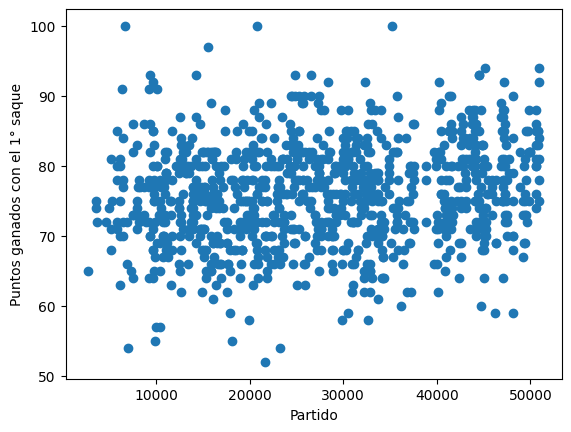

In [16]:
y = df_novak_1['w_1servewon_per']
x = df_novak_1.index
plt.scatter(x, y)
plt.xlabel('Partido')
plt.ylabel('Puntos ganados con el 1° saque')
plt.show()

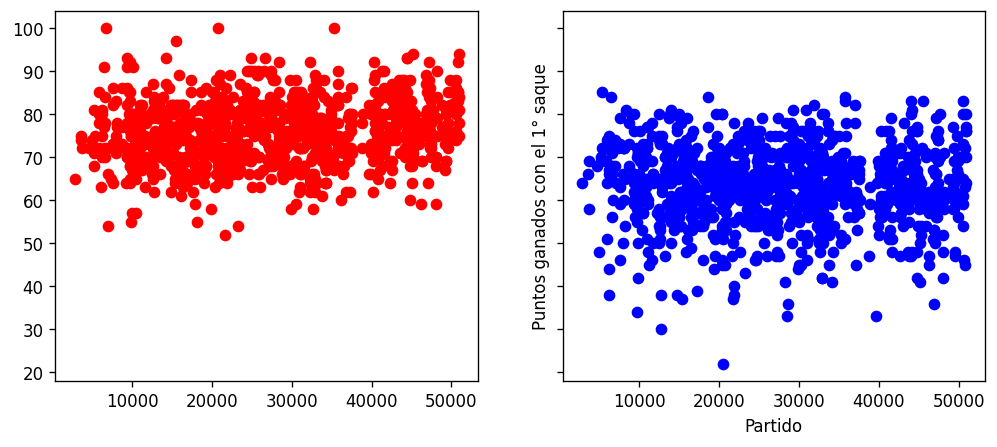

'Cantidad de puntos convertidos con el primer saque.'

In [59]:
fig, ax = plt.subplots(1,2,sharex=True, sharey=True, dpi=120, figsize=(10, 4))

y1 = df_novak_1['w_1servewon_per']
x1 = df_novak_1.index

y2 = df_novak_1['l_1servewon_per']
x2 = df_novak_1.index

ax[0].scatter(x1, y1, color='red')
ax[1].scatter(x2, y2, color='blue')

#plt.scatter(x, y)
plt.xlabel('Partido')
plt.ylabel('Puntos ganados con el 1° saque')
plt.show()
"Cantidad de puntos convertidos con el primer saque."

#### Analizamos las medias y el decil más alto.

In [18]:
df_novak_1['w_1servewon_per'].mean().round(2)

76.06

In [19]:
df_novak_1['l_1servewon_per'].mean().round(2)

63.19

In [20]:
df_novak_1['w_1servewon_per'].quantile(.9)

85.0

In [21]:
df_novak_1['l_1servewon_per'].quantile(.9)

75.0

#### El porcentaje de primeros saques es más alto que el de su rivales.

#### En general, está entre 10% a 15% mas alto que el de sus rivales. En algunos casos es mucho mayor. Djokovic genera un gran resultado con sus primeros saques. Incluso, su media en las victorias es ligeramente mas alto que el decil más alto de sus rivales.

####  Es un claro indicador de que influye en las victorias.

## Superficies.

#### Determinamos en las superficies donde mayor cantidad de victorias ha conseguido.

#### Si bien la mayoría de los torneos se juegan en superficie dura, hay jugadores donde se destacan mejor en arcilla o césped.

#### Una superficie favorable para el jugador, da una ventaja importante.

#### Se descarta la superficie Carpet porque, desde 2009, no se usa.

surface
Hard      635
Clay      248
Grass     109
Carpet      6
Name: count, dtype: int64


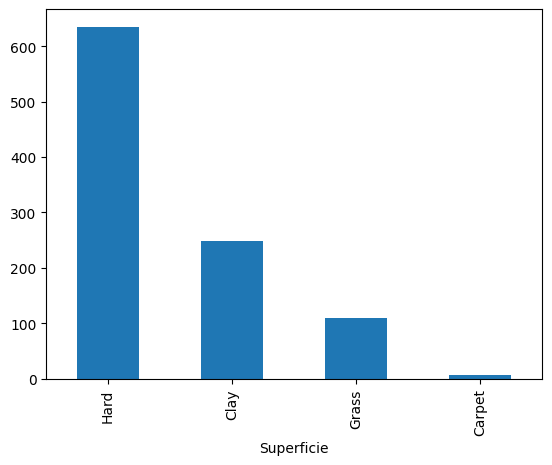

In [22]:
counts = df_novak_1['surface'].value_counts()
print(counts)
counts.plot.bar()
plt.xlabel('Superficie')
plt.show()

surface
Clay     80
Grass    86
Hard     84
Name: count, dtype: int32


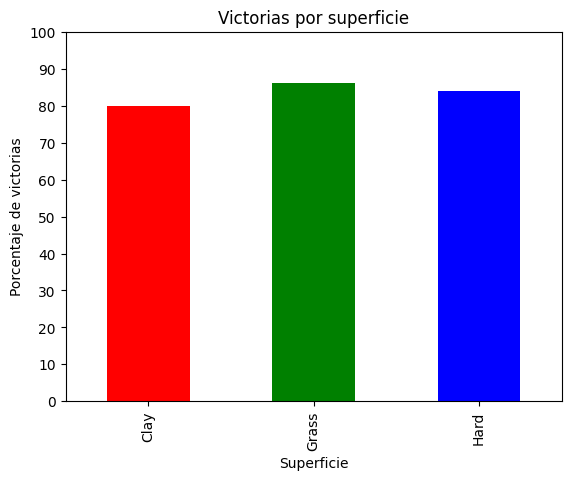

In [23]:
counts_vic_1 = df_novak_1['surface'].value_counts()
counts_der_1 = df_novak_2['surface'].value_counts()

dict_colors = {'Clay': 'r', 'Grass':'g', 'Hard':'b'}
suma_count_1 = counts_vic_1 + counts_der_1
por_victories_sup_1 = (((counts_vic_1/suma_count_1)*100).astype(int))
por_victories_sup_1 = por_victories_sup_1.drop('Carpet')
print(por_victories_sup_1.sort_index())

lista_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

por_victories_sup_1.sort_index().plot.bar(x=list(dict_colors.keys()), color=dict_colors.values())

plt.xlabel('Superficie')
plt.ylabel('Porcentaje de victorias')
plt.title('Victorias por superficie')
plt.yticks(lista_ticks)
plt.show()

#### La mayor cantidad de victorias se da en césped.

#### Sin embargo, el porcentaje de victorias es similar a las demás superficies. Destaca bien en todas.

## Aces.

#### Otra variable a tener en cuenta es la cantidad de aces. En algunos jugadores, es algo determinante ya que pueden definir su estilo de juego.

#### No suele ser algo tan determinante ya que, hay mucho riesgo involucrado por fallar el primero y asegurar el segundo saque.

Text(0, 0.5, 'Frecuencia')

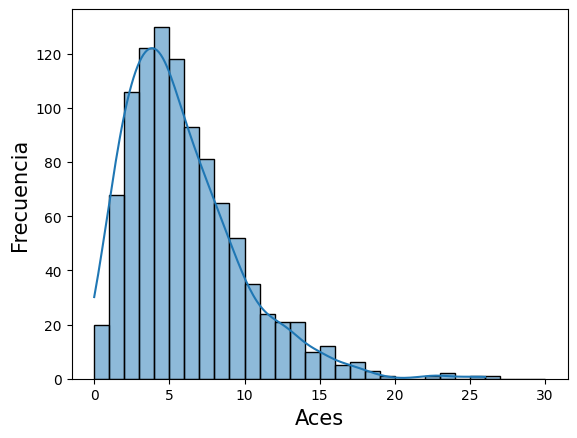

In [24]:
chart = sns.histplot(data=df_novak_1, x="w_ace", bins=30, kde=True, binrange=[0,30])
chart.set_xlabel('Aces', fontdict={'size': 15})
chart.set_ylabel('Frecuencia', fontdict={'size': 15})

Text(0, 0.5, 'Frecuencia')

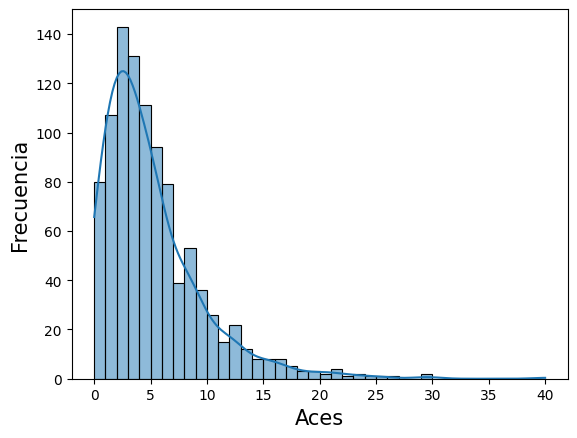

In [25]:
chart = sns.histplot(data=df_novak_1, x="l_ace", bins=30, kde=True, binrange=[0,30])
chart.set_xlabel('Aces', fontdict={'size': 15})
chart.set_ylabel('Frecuencia', fontdict={'size': 15})

#### Analizamos la media y el decil mas alto.

In [26]:
math.ceil(df_novak_1['w_ace'].mean())

6

In [27]:
math.ceil(df_novak_1['l_ace'].mean())

5

In [28]:
math.ceil(df_novak_1['w_ace'].quantile(.9))

11

In [29]:
math.ceil(df_novak_1['l_ace'].quantile(.9))

10

#### La cantidad de aces es ligeramente superior a la de sus rivales. No parece influir mucho en la victoria.

#### Sin embargo, hace una pequeña diferencia durante el juego.

## Break points.

#### Break points son aquellos puntos decisivos que se ganan contra el saque del rival.  Esto es un indicador de un jugador que juega muy bien cuando recibe el saque de rival y es capaz de ganarle games sin su saque.  Conseguir break points es fundamental para romper el ciclo normal del set.Es un factor muy importante. También, no recibir break points en contra.  

In [30]:
df_novak_1['break_points_made'] = (df_novak_1['l_bpFaced']-df_novak_1['l_bpSaved']).astype(int)
df_novak_1['break_points_recieved'] = (df_novak_1['w_bpFaced']-df_novak_1['w_bpSaved']).astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19428\2729198813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novak_1['break_points_made'] = (df_novak_1['l_bpFaced']-df_novak_1['l_bpSaved']).astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19428\2729198813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novak_1['break_points_recieved'] = (df_novak_1['w_bpFaced']-df_novak_1['w_bpSaved']).astype(int)


In [31]:
df_novak_1.sample(10)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,w_1serve_per,w_1servewon_per,l_1servewon_per,break_points_made,break_points_recieved
19948,154946,2011-580,Australian Open,Hard,128,G,20110117,118,104925,3,0,Novak Djokovic,R,188,SRB,23,104597,14,0,Nicolas Almagro,R,183,ESP,25,6-3 6-4 6-0,5,R16,104,12,4,75,56,48,9,13,3,3,5,2,78,46,28,14,12,8,13,3,6240,14,2160,74,85,60,5,0
15973,150282,2009-500,Halle,Grass,32,A,20090608,16,104925,2,0,Novak Djokovic,R,188,SRB,22,104620,0,0,Simone Bolelli,R,183,ITA,23,7-5 6-2,3,R32,84,8,2,61,44,33,10,10,2,2,2,1,78,55,35,9,10,7,10,4,8020,66,951,72,75,63,3,0
25313,160969,2013-580,Australian Open,Hard,128,G,20130114,125,104925,1,0,Novak Djokovic,R,188,SRB,25,103970,4,0,David Ferrer,R,175,ESP,30,6-2 6-2 6-1,5,SF,89,6,0,51,32,29,15,11,0,0,1,3,75,45,25,9,12,0,7,1,12920,5,6505,62,90,55,7,0
24299,159875,2012-96,London Olympics,Grass,64,A,20120725,48,104925,2,0,Novak Djokovic,R,188,SRB,25,104053,0,0,Andy Roddick,R,188,USA,29,6-2 6-1,3,R32,54,14,0,43,29,25,8,8,0,0,5,1,40,24,13,7,7,0,4,2,11000,22,1600,67,86,54,4,0
41501,178230,2018-0605,Tour Finals,Hard,8,F,20181112,299,104925,1,0,Novak Djokovic,R,188,SRB,31,104731,4,0,Kevin Anderson,R,203,RSA,32,6-2 6-2,3,SF,75,6,1,39,27,23,9,8,0,0,4,3,60,33,23,7,8,5,9,1,8045,6,4310,69,85,69,4,0
22574,157904,2012-580,Australian Open,Hard,128,G,20120116,65,104925,1,0,Novak Djokovic,R,188,SRB,24,105053,0,0,Santiago Giraldo,R,188,COL,24,6-3 6-2 6-1,5,R64,102,9,2,65,36,29,19,12,1,2,3,3,73,38,24,11,12,6,13,1,13630,56,845,55,80,63,7,1
18026,152823,2010-416,Rome Masters,Clay,56,M,20100425,40,104925,2,0,Novak Djokovic,R,188,SRB,22,104871,0,0,Jeremy Chardy,R,188,FRA,23,6-1 6-1,3,R32,60,1,2,39,27,22,7,7,0,0,5,2,52,29,19,4,7,2,7,2,7390,46,920,69,81,65,5,0
42236,178979,2019-M007,Miami Masters,Hard,128,M,20190318,269,104925,1,0,Novak Djokovic,R,188,SRB,31,106071,0,0,Bernard Tomic,R,193,AUS,26,7-6(2) 6-2,3,R64,73,11,3,58,36,29,14,10,0,1,9,4,64,39,28,10,10,1,4,1,10990,81,679,62,80,71,3,1
31030,167475,2015-403,Miami Masters,Hard,96,M,20150325,89,104925,1,0,Novak Djokovic,R,188,SRB,27,103970,6,0,David Ferrer,R,175,ESP,32,7-5 7-5,3,QF,113,2,4,64,35,29,14,12,0,2,1,3,85,48,28,18,12,3,7,1,13205,7,4580,54,82,58,4,2
27897,163884,2014-580,Australian Open,Hard,128,G,20140113,96,104925,2,0,Novak Djokovic,R,188,SRB,26,104919,0,0,Leonardo Mayer,R,188,ARG,26,6-0 6-4 6-4,5,R64,107,12,2,67,44,36,17,13,0,0,3,7,85,44,28,17,13,1,6,2,12260,98,579,65,81,63,5,0


Text(0, 0.5, 'Frecuencia')

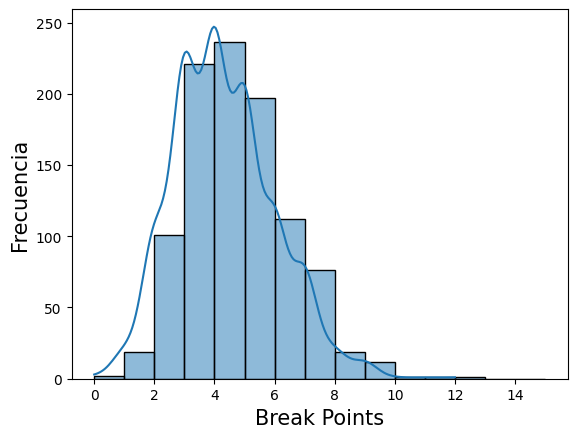

In [32]:
chart = sns.histplot(data=df_novak_1, x="break_points_made", bins=15, kde=True, binrange=[0,15])
chart.set_xlabel('Break Points', fontdict={'size': 15})
chart.set_ylabel('Frecuencia', fontdict={'size': 15})

Text(0, 0.5, 'Frecuencia')

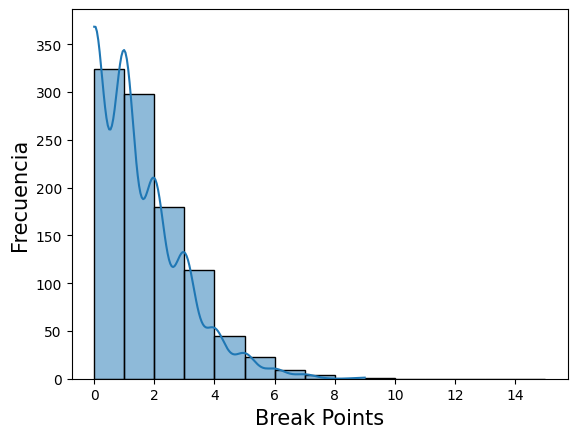

In [33]:
chart = sns.histplot(data=df_novak_1, x="break_points_recieved", bins=15, kde=True, binrange=[0,15])
chart.set_xlabel('Break Points', fontdict={'size': 15})
chart.set_ylabel('Frecuencia', fontdict={'size': 15})

#### Analizamos las medias y el decil más alto.

In [34]:
math.ceil(df_novak_1['break_points_made'].mean())

5

In [35]:
math.ceil(df_novak_1['break_points_recieved'].mean())

2

In [36]:
math.ceil(df_novak_1['break_points_made'].quantile(.9))

7

In [37]:
math.ceil(df_novak_1['break_points_recieved'].quantile(.9))

3

In [42]:
df_novak = pd.concat([df_novak_1, df_novak_2], ignore_index=False)

In [43]:
df_novak = df_novak_1.drop(['surface','winner_name','loser_name','score','best_of','round'], axis=1)

In [45]:
df_novak.head(10)

,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,w_1serve_per,w_1servewon_per,l_1servewon_per,break_points_made,break_points_recieved
2770,4,2,91,60,39,19,14,2,5,0,2,93,62,40,16,14,7,10,65,65,64,3,3
3606,1,1,12,8,6,2,2,0,0,0,1,20,12,8,1,3,3,5,66,75,66,2,0
3622,12,2,82,51,38,19,11,4,5,4,2,74,49,34,12,10,6,8,62,74,69,2,1
3694,4,3,80,51,37,12,11,5,7,5,5,90,65,38,14,11,6,9,63,72,58,3,2
4620,1,0,52,36,26,13,9,4,4,1,1,41,25,17,7,8,1,4,69,72,68,3,0
4979,6,2,58,39,29,12,10,1,2,4,4,80,45,22,11,11,7,16,67,74,48,9,1
5155,2,5,94,65,53,16,16,2,3,4,5,97,63,44,18,14,7,10,69,81,69,3,1
5192,8,4,173,105,75,31,26,9,18,6,5,182,108,76,33,26,10,17,60,71,70,7,9
5255,3,5,179,119,81,29,26,12,16,22,5,147,78,67,39,26,1,3,66,68,85,2,4
5306,6,4,138,85,64,26,22,3,7,8,3,133,88,64,20,20,8,13,61,75,72,5,4


In [47]:
df_novak.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 2770 to 50934
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   w_ace                  998 non-null    int64
 1   w_df                   998 non-null    int64
 2   w_svpt                 998 non-null    int64
 3   w_1stIn                998 non-null    int64
 4   w_1stWon               998 non-null    int64
 5   w_2ndWon               998 non-null    int64
 6   w_SvGms                998 non-null    int64
 7   w_bpSaved              998 non-null    int64
 8   w_bpFaced              998 non-null    int64
 9   l_ace                  998 non-null    int64
 10  l_df                   998 non-null    int64
 11  l_svpt                 998 non-null    int64
 12  l_1stIn                998 non-null    int64
 13  l_1stWon               998 non-null    int64
 14  l_2ndWon               998 non-null    int64
 15  l_SvGms                998 non-null    i

In [46]:
df_novak.corr()

,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,w_1serve_per,w_1servewon_per,l_1servewon_per,break_points_made,break_points_recieved
w_ace,1.000000,0.158594,0.394087,0.418297,0.506327,0.278961,0.456631,0.114317,0.119354,0.321326,0.147445,0.431458,0.407379,0.434666,0.383912,0.454869,0.148086,0.140672,0.115719,0.216914,0.236065,0.058196,0.081271
w_df,0.158594,1.000000,0.469739,0.393567,0.382069,0.364183,0.404733,0.400966,0.466154,0.204277,0.223455,0.373486,0.320082,0.325885,0.391664,0.400152,0.137365,0.161465,-0.289537,-0.144272,0.153637,0.131661,0.407492
w_svpt,0.394087,0.469739,1.000000,0.973084,0.938392,0.829603,0.949955,0.609279,0.705160,0.508524,0.291493,0.892976,0.851316,0.871646,0.786448,0.942674,0.367455,0.379231,-0.086367,-0.348737,0.369613,0.220070,0.611019
w_1stIn,0.418297,0.393567,0.973084,1.000000,0.971355,0.718702,0.932556,0.572260,0.655699,0.511229,0.280367,0.878176,0.844601,0.862840,0.759534,0.925291,0.368422,0.378988,0.130877,-0.329023,0.359446,0.217538,0.556848
w_1stWon,0.506327,0.382069,0.938392,0.971355,1.000000,0.679102,0.932385,0.489886,0.545241,0.548866,0.277360,0.878834,0.849844,0.879815,0.765595,0.924783,0.359381,0.347098,0.159759,-0.111627,0.396694,0.155553,0.435282
w_2ndWon,0.278961,0.364183,0.829603,0.718702,0.679102,1.000000,0.821510,0.453072,0.521250,0.480684,0.268074,0.766035,0.720977,0.763368,0.691649,0.811607,0.304296,0.290611,-0.436444,-0.313717,0.386380,0.123473,0.446324
w_SvGms,0.456631,0.404733,0.949955,0.932556,0.932385,0.821510,1.000000,0.437312,0.565269,0.540033,0.305539,0.932179,0.887591,0.902881,0.814047,0.988418,0.406471,0.429570,-0.043545,-0.212505,0.371727,0.268695,0.590920
w_bpSaved,0.114317,0.400966,0.609279,0.572260,0.489886,0.453072,0.437312,1.000000,0.936932,0.163573,0.160167,0.391714,0.375287,0.375289,0.329591,0.433417,0.153210,0.190731,-0.135177,-0.420560,0.145336,0.173535,0.434937
w_bpFaced,0.119354,0.466154,0.705160,0.655699,0.545241,0.521250,0.565269,0.936932,1.000000,0.182784,0.198323,0.521469,0.490659,0.468561,0.438723,0.563862,0.230708,0.306903,-0.180094,-0.544437,0.124182,0.310701,0.722229
l_ace,0.321326,0.204277,0.508524,0.511229,0.548866,0.480684,0.540033,0.163573,0.182784,1.000000,0.278505,0.516219,0.500302,0.615750,0.430624,0.543643,0.139130,0.046496,0.022299,0.022870,0.509072,-0.160146,0.147215


#### Djokovic saca una gran ventaja en brak points en sus victorias. En contrapartida, recibe pocos durante sus victorias. 

## Insights

### * La mayor ventaja la saca con los puntos ganados con el primer servicio. Es el facotr más importante de su juego.

### * El porcentaje victorias en las superficies son muy parejos. Rinde muy bien en cualquier superficie.

### * En los aces, no saca mucha ventaja. Sin embargo, es ligeramente superior que sus rivales.

### * En los break points, saca ventaja sobre sus rivales. La diferencia de puntos le garantiza, al menos, un set.